In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics
import seaborn as sns

In [2]:
df = pd.read_csv('Ordinal+Lasso.csv')

In [3]:
df.head(3)

,Unnamed: 0,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,Unnamed: 0.1,PID,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,Lasso
0,0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,1,909176150,856,126000,68.516053,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0,119703.199217
1,1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,0.0,1.0,4.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,2,905476230,1049,139500,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0,117288.214611
2,2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,3,911128020,1001,124900,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0,131483.009302


In [4]:
X_ordinal = df.drop(['SalePrice'], axis=1).values
Y_ordinal = df.SalePrice.values

In [5]:
X_ordinal.shape

(2580, 83)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X_ordinal,Y_ordinal,test_size=0.25)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb = XGBRegressor()
xgb.fit(X_train_scaled, Y_train)
XGB_Score = xgb.score(X_test_scaled, Y_test)

In [7]:
XGB_Score

0.9058977624586761

In [8]:
xgb.feature_importances_

array([7.1229384e-04, 7.5648288e-04, 5.5302720e-04, 1.6337448e-03,
       4.5787864e-03, 4.9110095e-04, 5.3010522e-03, 0.0000000e+00,
       4.7380329e-04, 2.6856943e-03, 1.0114842e-03, 1.7027385e-03,
       3.5366225e-03, 1.6259491e-03, 3.8948984e-04, 4.3002941e-04,
       1.7329529e-02, 1.2805386e-03, 3.8624043e-03, 9.1202639e-04,
       1.7229847e-03, 1.1468655e-03, 4.2955414e-04, 2.2712771e-03,
       9.0416579e-04, 2.0144302e-03, 1.1299266e-03, 1.1415877e-03,
       0.0000000e+00, 1.0578623e-03, 3.0444091e-02, 7.6537475e-04,
       2.2097551e-03, 2.5056754e-03, 1.2299913e-03, 5.1701795e-03,
       6.7446305e-04, 2.1757814e-03, 3.9980654e-03, 5.8246288e-03,
       0.0000000e+00, 8.4720465e-04, 7.5962133e-04, 1.1843153e-03,
       6.4102566e-04, 5.5681956e-03, 2.9143009e-03, 1.1308079e-03,
       2.0961980e-03, 3.9457739e-03, 1.9421385e-03, 2.1177332e-03,
       9.3171215e-03, 3.6993250e-03, 2.7771317e-03, 2.0744838e-03,
       2.6007579e-03, 1.5598794e-03, 1.1369541e-03, 1.9475342e

In [9]:
X_cols = df.drop(['SalePrice'], axis=1).columns
sorted_importance = sorted(zip(X_cols, xgb.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance

[('Lasso', 0.7874907),
 ('CentralAir', 0.030444091),
 ('RoofMatl', 0.017329529),
 ('OverallQual', 0.0093171215),
 ('2ndFlrSF', 0.0065536043),
 ('FullBath', 0.0064750346),
 ('PavedDrive', 0.0058246288),
 ('SaleType', 0.0055681956),
 ('LandContour', 0.0053010522),
 ('GarageType', 0.0051701795),
 ('Alley', 0.0045787864),
 ('GarageCond', 0.0039980654),
 ('GrLivArea', 0.003945774),
 ('Exterior2nd', 0.0038624043),
 ('OverallCond', 0.003699325),
 ('Condition2', 0.0035366225),
 ('BsmtHalfBath', 0.0035350854),
 ('BsmtFullBath', 0.0034322862),
 ('Fireplaces', 0.0033811259),
 ('GarageYrBlt', 0.003069062),
 ('SaleCondition', 0.002914301),
 ('YearBuilt', 0.0027771317),
 ('LandSlope', 0.0026856943),
 ('TotalBsmtSF', 0.0026653174),
 ('MasVnrArea', 0.0026007579),
 ('Functional', 0.0025056754),
 ('BsmtQual', 0.0022712771),
 ('WoodDeckSF', 0.002231429),
 ('KitchenQual', 0.0022097551),
 ('GarageQual', 0.0021757814),
 ('EnclosedPorch', 0.002140791),
 ('LotArea', 0.0021177332),
 ('OpenPorchSF', 0.002112740

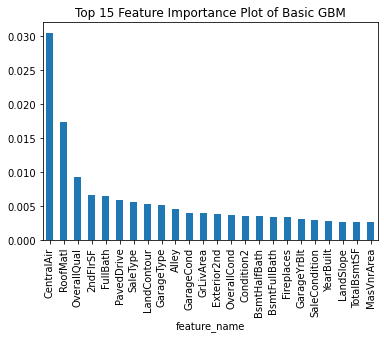

In [10]:
a, b = zip(*sorted_importance[1:25]) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.bar(x='feature_name',y='importance_score', legend=None)
plt.title('Top 15 Feature Importance Plot of Basic GBM');

In [11]:
X_ordinal_scaled = scaler.transform(X_ordinal)
len(X_ordinal_scaled)

2580

In [12]:
predicted_value = xgb.predict(X_ordinal_scaled)

In [13]:
true_value = Y_ordinal

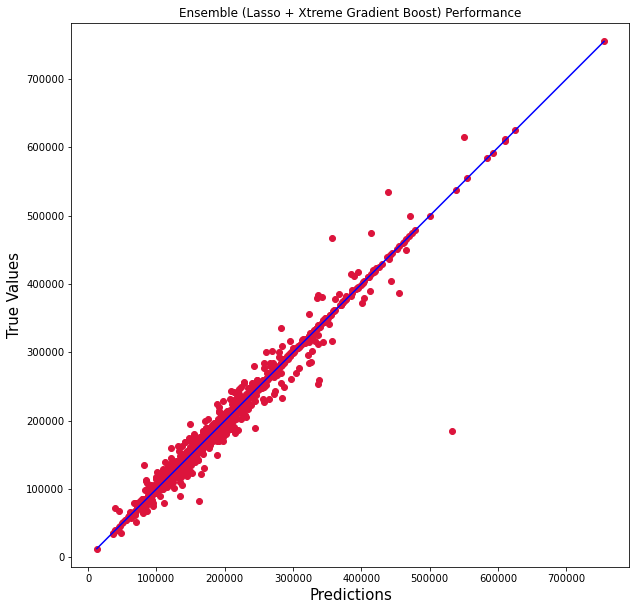

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(predicted_value, true_value, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

plt.title('Ensemble (Lasso + Xtreme Gradient Boost) Performance')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('True Values', fontsize=15)
plt.axis('equal')
plt.show()